<a href="https://colab.research.google.com/github/mathdeoliveira/Portfolio_DataScience/blob/master/Previs%C3%A3o_de_valores_de_im%C3%B3veis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prever o preço de imóveis de São Paulo

Neste projeto iremos usar Machine Learning para prever os preços de imóveis para a cidade de São Paulo, para isso vamos usar um conjunto de dados compartilhado no [Kaggle](www.kaggle.com).

<p align=center>
<img src="https://i.imgur.com/a04myX9.jpg" width="40%"></p>
<p align=center>Design by: Chubarovalexandr</p>


Aqui nesse notebook iremos fazer a importação dos dados e a explicação sobre eles, um análise exploratória dos dados e aplicação de algoritmos de Machine Learning.

Após isso vamos criar um webapp e subir a aplicação para um ambiente de produção, onde vamos usar o Flask.



## Dados dos Imóveis

Os dados utilizado neste projeto foram obtidos [neste link](https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019).

Esse conjunto de dados contém aproximadamente 13000 apartamentos para venda e aluguel para cidade de São Paulo, e só tem dados para a data de Abril de 2019.

### Importação dos dados

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)

In [0]:
# importar dados
df = pd.read_csv('https://raw.githubusercontent.com/mathdeoliveira/files/master/sao-paulo-properties-april-2019.csv')
df.columns = df.columns.str.lower().str.replace(" ","_")

### Análise Exploratória dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados, primeiramente vamos criar um dicionário para cada variável do nosso conjunto de dados, retirado do Kaggle.

Dicionário das variáveis

* Price - Preço final anunciado em reais (R$)
* Condo - Preço do condomínio
* Size - Tamanho da propriedade em m²
* Rooms - Número de quartos
* Toilets - Número de banheiros
* Suites - Número de quartos com banheiro privativo
* Parking - Número de vagas de garagem
* Elevator - Se tem ou não elevador
* Furnished - Se a propriedade é mobiliada ou não
* Swimming Pool - Se a propriedade tem ou não piscina
* New - Se a propriedade é nova ou não
* District - Nome do bairro e cidade onde a propriedade está localizada
* Negotiation Type - Se a propriedade está para venda ou aluguel
* Property Type - Tipo da propriedade
* Latitude - Localização geográfica
* Longitude - Localização geográfica



In [0]:
# vamos usar a função describe para visualizarmos dados estatísticos sobre os nosso dados
df.describe()

,price,condo,size,rooms,toilets,suites,parking,elevator,furnished,swimming_pool,new,latitude,longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000


Com as informações acima podemos retirar alguns insights sobre os dados, como por exemplo:

1.   O maior tamanho de apartamentos anunciados é de 880m² e o menor é de 30m² e a média é de aproximademente 84,37m².
2.   Existe um apartamento que tem 9 vagas de garagem disponível, um com 10 quartos e outro com 8 banheiros.



#### Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?


In [0]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 13640
Variáveis:	 16



price                 int64
condo                 int64
size                  int64
rooms                 int64
toilets               int64
suites                int64
parking               int64
elevator              int64
furnished             int64
swimming_pool         int64
new                   int64
district             object
negotiation_type     object
property_type        object
latitude            float64
longitude           float64
dtype: object

####Qual a porcentagem de valores ausentes no dataset?

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

longitude           0.0
latitude            0.0
property_type       0.0
negotiation_type    0.0
district            0.0
new                 0.0
swimming_pool       0.0
furnished           0.0
elevator            0.0
parking             0.0
suites              0.0
toilets             0.0
rooms               0.0
size                0.0
condo               0.0
price               0.0
dtype: float64

#### Análise sobre cada coluna do nosso dataset

In [0]:
def check_df_columns(df):
    for col in df.columns:

        print(f" ----- {col} ----- ")
        print(100 * (df[col].value_counts() / df.shape[0]))
        
check_df_columns(df)

 ----- price ----- 
1500       2.690616
1200       2.653959
2500       2.192082
2000       2.023460
1300       2.023460
             ...   
309900     0.007331
613000     0.007331
2325000    0.007331
495900     0.007331
802800     0.007331
Name: price, Length: 1881, dtype: float64
 ----- condo ----- 
0       14.494135
400      2.221408
500      2.199413
350      1.972141
600      1.957478
          ...    
4050     0.007331
1995     0.007331
1939     0.007331
1923     0.007331
7800     0.007331
Name: condo, Length: 1415, dtype: float64
 ----- size ----- 
50     5.337243
60     3.768328
70     3.548387
48     3.020528
65     2.895894
         ...   
317    0.007331
309    0.007331
283    0.007331
307    0.007331
415    0.007331
Name: size, Length: 339, dtype: float64
 ----- rooms ----- 
2     49.604106
3     31.576246
1     12.756598
4      5.879765
5      0.146628
6      0.021994
7      0.007331
10     0.007331
Name: rooms, dtype: float64
 ----- toilets ----- 
2    60.043988
1    23.36

As informações acima mostra bastante insights, ela nós mostra a distribuição da quantidade dos valores para cada uma das variáveis, então por exemplo, 5% dos aptos anunciados são de 50m², 60% dos aptos têm dois banheiros, 63% dos aptos tem pelo menos 1 suíte, 51% dos aptos tem piscina e 98% dos aptos não são aptos novos.

#### Vimos que existe apartamentos com números expressivos, vamos verificar sobre a quantidade de quartos

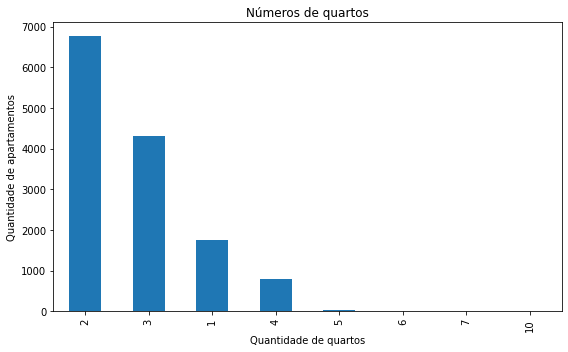

In [0]:
fig, ax = plt.subplots(figsize=(8,5))

df['rooms'].value_counts().plot(kind='bar')
plt.title('Números de quartos')
plt.xlabel('Quantidade de quartos')
plt.ylabel('Quantidade de apartamentos')

plt.tight_layout()

Com o gráfico acima podemos evidenciar que a grande maioria dos aptos anunciados tem dois quartos. É interessante sabermos disso pois assim sabemos que a maioria dos aptos são construídos com dois quartos estão à venda, com essa informação podemos levar às construtoras dizendo que com esse número de quartos podem atrair mais compradores. Claro que, não podemos fixar essa informação como verdade única, temos outras variáveis que vão levar ou não a compra e não podemos deixar de lado.

#### Localização dos imóveis pela cidade de São Paulo

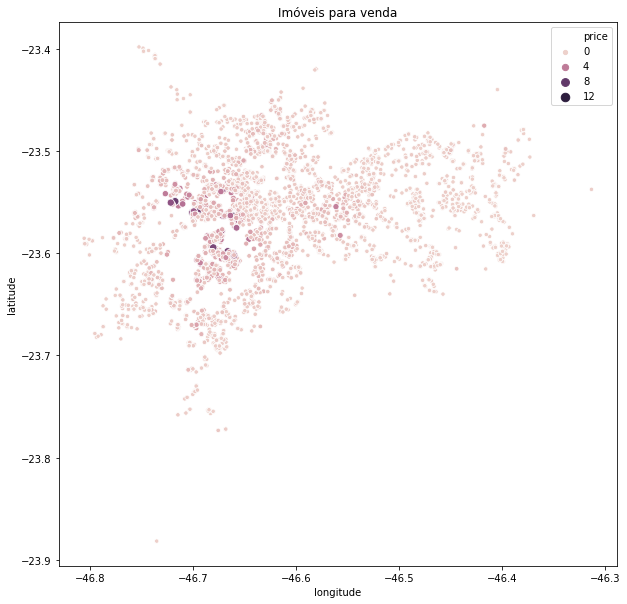

In [0]:
mask = (df.longitude < -46) & (df.longitude > -46.9) & (df.latitude < -23) & (df.latitude > -24)
df = df[mask]
sale = df.negotiation_type == "sale"
df_sale = df[sale]
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_sale, x="longitude", y="latitude", hue="price", size="price").set_title('Imóveis para venda');

Sabemos que os imóveis anunciados são somente da cidade de São Paulo, com o gráfico acima, podemos descobrir a localização de cada um dos aptos anunciado, e vamos evidenciar no gráfico o preço de cada um deles, onde as cores mais escura dos pontos tem o maior preço e os pontos com cores mais claras tem o menor preço.

Ainda fica pendente colocar por baixo desses pontos o mapa da cidade para a melhor visualização.

Média do preço de venda para cada bairro da cidade de São Paulo

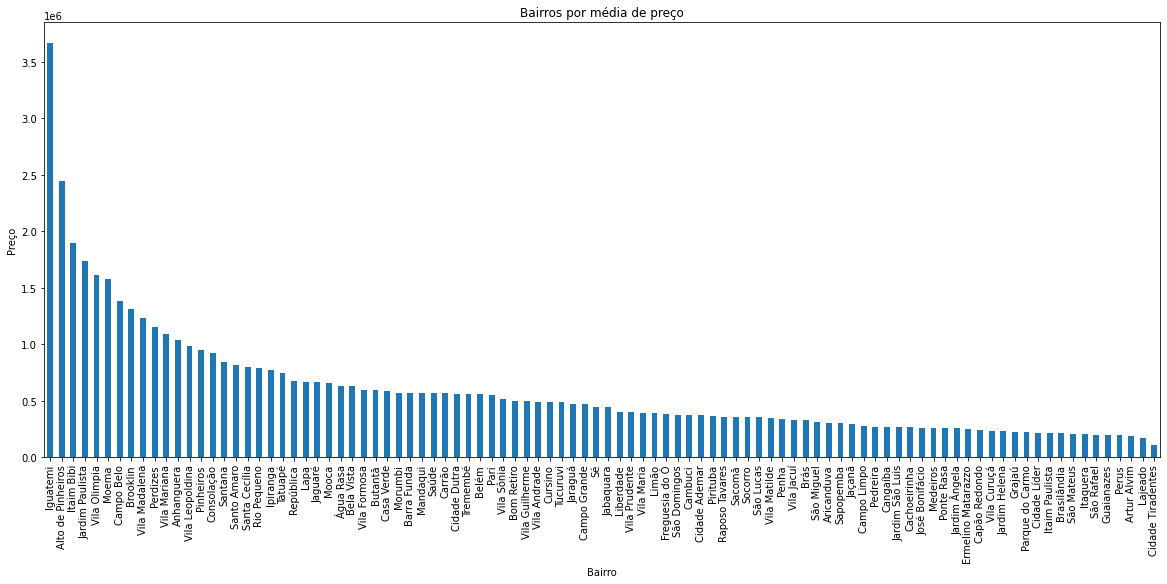

In [0]:
df_sale['district'] = df_sale['district'].apply(lambda x: x.split('/')[0])
df_sale.groupby('district')['price'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(20,8), title='Bairros por média de preço')
plt.xlabel('Bairro')
plt.ylabel('Preço')
plt.show()

Temos a localização de todos os apartamentos para venda na cidade, mas queria ver quais são os bairros que tem a maior média de preço, temos que Iguatemi tem o maior preço de venda de apartamentos.

Não sou de São Paulo, então é uma boa prática seria validar se esse resultado está de acordo com a realidade do bairro.

# Modelos de Machine Learning

Para esse projeto iremos usar algumas variáveis númericas para prever a variável target `price`. 

In [0]:
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Pre-processing

Vamos iniciar um pré-processamento, vamos retirar algumas variáveis que não me interessa para o nosso modelo, já fiz alguns testes e essas variáveis não faz com que o nosso modelo seja mais eficiente, mas para o futuro seria interessante adicionar as variáveis `elevator`, `furnished`, `swimming_pool` e `new`. Nesse primeiro projeto iremos manter mais simples.

Após isso, vamos usar o LabelEncoder para transformar a variável `district` de categórica para númerica. Então, esse processo transforma, por exemplo, o valor categórico 'Carrão' será transformado para o valor número '19', e o nosso modelo de ML irá usar isso para poder prever os futuros dados.

In [0]:
# retirar toda a coluna das variáveis
df_sale.drop(['property_type', 'latitude', 'longitude','negotiation_type', 'elevator', 'furnished', 'swimming_pool', 'new'], axis=1, inplace=True)

In [0]:
# instanciar o LabelEncoder e treinar ele com os dados de 'district'
le = preprocessing.LabelEncoder()
df_sale['district'] = le.fit_transform(df_sale['district'])

Feito isso, vamos agora partir pro processo de dividir os nossos dados de teste e treino.

In [0]:
# separar entre variáveis X e y
X = df_sale[['condo', 'size', 'rooms', 'toilets', 'suites', 'parking','district']]
y = df_sale['price']

# split entre datasets de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

O intuito do modelo é a previsão do valor do preço de venda de um imóvel, com isso já sei que vamos usar os algoritmos de regressão, existe vários algoritmos de regressão, vou escolher alguns para ver como eles se saem com os nosso dados. As métricas de avaliação dos modelos que escolhi, foram: r2_score, mean_squared_erros e mean_absolute_erros.

A explicação do funcionamento de cada modelo e dos parâmetros fica para um próximo momento, ficaria bastante extenso o notebook. Não entrei também no processo de tunning dos parâmetros, em um projeto real devemos fazer todo esse processo, mas aqui o projeto é tem como intuito o treino/estudo, vamos manter um pouco mais simples.

## XGBoost

Os parâmetros desse modelo foram retirados de alguns artigos que li sobre, e fui testando até chegar nesses.

In [0]:
# instanciar e treinar o modelo
model_xgboost = XGBRegressor(max_depth=3,
                         min_child_weight=1.7817, n_estimators=2200,
                         reg_alpha=0.4640, reg_lambda=0.8571,
                         subsample=0.5213, silent=1,
                         random_state =42, nthread = -1)
model_xgboost.fit(X_train, y_train)

# fazer as previsões em cima do dataset de teste
y_pred_xgboost = model_xgboost.predict(X_test)

# métricas de avaliação
print("r2: \t{:.4f}".format(r2_score(y_test, y_pred_xgboost)))
print("MAE: \t{:.4f}".format(mean_absolute_error(y_test, y_pred_xgboost)))
print("MSE: \t{:.4f}".format(mean_squared_error(y_test, y_pred_xgboost)))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


r2: 	0.8700
MAE: 	110700.3328
MSE: 	58292344560.5136


## LASSO Regression

In [0]:
# instanciar e treinar o modelo
model_lasso = linear_model.Lasso(alpha=0.1,random_state =42)
model_lasso.fit(X_train, y_train)

# fazer as previsões em cima do dataset de teste
y_pred_lasso = model_lasso.predict(X_test)

# métricas de avaliação
print("r2: \t{:.4f}".format(r2_score(y_test, y_pred_lasso)))
print("MAE: \t{:.4f}".format(mean_absolute_error(y_test, y_pred_lasso)))
print("MSE: \t{:.4f}".format(mean_squared_error(y_test, y_pred_lasso)))

r2: 	0.7293
MAE: 	187141.8827
MSE: 	121425743047.0754


## Random Forest Regression

In [0]:
# instanciar e treinar o modelo
model_rfr = RandomForestRegressor(random_state =42)
model_rfr.fit(X_train, y_train)

# fazer as previsões em cima do dataset de teste
y_pred_rfr = model_rfr.predict(X_test)

# métricas de avaliação
print("r2: \t{:.4f}".format(r2_score(y_test, y_pred_rfr)))
print("MAE: \t{:.4f}".format(mean_absolute_error(y_test, y_pred_rfr)))
print("MSE: \t{:.4f}".format(mean_squared_error(y_test, y_pred_rfr)))

r2: 	0.8619
MAE: 	118208.1299
MSE: 	61952392489.0035


## Linear Regression

In [0]:
# instanciar e treinar o modelo
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# fazer as previsões em cima do dataset de teste
y_pred_lr = model_lr.predict(X_test)

# métricas de avaliação
print("r2: \t{:.4f}".format(r2_score(y_test, y_pred_lr)))
print("MAE: \t{:.4f}".format(mean_absolute_error(y_test, y_pred_lr)))
print("MSE: \t{:.4f}".format(mean_squared_error(y_test, y_pred_lr)))

r2: 	0.7293
MAE: 	187141.9543
MSE: 	121425749997.6168


## Ensemble Gradient Boosting Regressor

Os parâmetros desse modelo foram retirados de alguns artigos que li sobre, e fui testando até chegar nesses.

In [0]:
# instanciar e treinar o modelo
model_en = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=4, learning_rate=0.1, loss='ls', min_samples_split=2,random_state =42)
model_en.fit(X_train, y_train)

# fazer previsões em cima do dataset de teste
y_pred_en = model_en.predict(X_test)

# métricas de avaliação
print("r2: \t{:.4f}".format(r2_score(y_test, y_pred_en)))
print("MAE: \t{:.4f}".format(mean_absolute_error(y_test, y_pred_en)))
print("MSE: \t{:.4f}".format(mean_squared_error(y_test, y_pred_en)))

r2: 	0.8876
MAE: 	109500.7608
MSE: 	50424357753.2230


De todos esses modelos, temos que o Ensemble é modelo que deve as melhores métricas, vamos comparar:

| Modelo | r2   | MAE   | MSE   |
|------|------|------|------|
|   XGBoost  | 0.8694|   112452.1951  | 58576833361.0457|
|   LASSO  | 0.7293|   187141.8827  | 121425743047.0754|
|   Random Forest  | 0.8513|   119049.1746  | 66709406068.8176|
|   Linear  | 0.7293|   187141.9543  | 121425749997.6168|
|   Ensemble  | 0.8890|   109087.3486  | 49808094192.0536 |

Com a estatística mostrada na tabela acima, podemos comparar a performance dos modelos. O r2_score é uma métrica importante, ela nós diz a acurácia do modelo, vamos partir dela para escolher o modelo.

Para o nosso conjunto de dados, o algoritmo Ensemble teve um score de previsão de 88.90%, que é um bom resultado, no futuro podemos incluir mais variáveis para melhorar o modelo e também começar o processo de tunning dos parâmetros. Mas por hora, esse modelo será escolhido pois teve uma melhor performance em comparação com os outros.

# Conclusão

O conjunto de dados aqui estudado é um bastante conhecido e com isso podemos aplicar vários modelos para aprender sobre eles, fizemos uma rápida análise de exploração dos dados e descobrimos algumas coisas interessantes, por exemplo, tem apartamento com nove vagas de garagem. Partimos para criar modelos de Machine Learning onde o intuito é conseguir criar um modelo que possa prever o valor de um apartamento na cidade de São Paulo.

Então  escolhemos que os algoritmos de Regressão são os melhores para esse fim, e o que se saiu melhor em comparação com outros, foi o Ensemble, dado a quantidade de dados, temos somente dados de Abril de 2019, ele teve um score de 88.90% de previsão, assim esse modelo tem uma alta possibilidade de prever o resultado de futuros dados. 

<p align=center>
<img src="https://i.imgur.com/5dXR97c.png" width="70%"></p>

Para ver o funcionamento desse modelo, eu criei de forma bem simples, um WebApp que podemos entrar com valores reais e com isso prever o valor com os dados de entrada, usando o modelo Ensemble treinado. A imagem acima mostra uma forma de como podemos implantar um modelo de Machine Learning, assim o usuário entra com os dados das características do apartamento e ele conseguir calcular a previsão do preço do imóvel.

Para testar, [Clique aqui](https://datascience-mathdeoliveira.herokuapp.com/)

Os tópicos abaixo mostram como podemos salvar o modelo treinado e como podemos fazer uma aplicação de teste para ver o resultado do modelo.

# Salvando o modelo

Vamos exportar o modelo treinado acima por meio da biblioteca `pickle` e usar ele no nosso webapp.

In [0]:
# salvar o modelo em formato pkl

import pickle

with open('modelo.pkl', 'wb') as file:
  pickle.dump(model_en,file)

É importante também salvar as nomes das features que o modelo espera receber.

In [0]:
# salvar os nomes das features do modelo simples
features = X_train.columns.values

with open('features.names', 'wb') as file:
    pickle.dump(features, file)

Deve-se também salvar o LabelEncoder treinado.

In [0]:
with open('district_encoder.pkl', 'wb') as file:
  pickle.dump(le, file)

# Carregar o modelo

Vamos carregar aqui o modelo treinado para testar o funcionamento

In [0]:
# importar modelo e feature names
with open('/content/modelo.pkl', 'rb') as file:
  model = pickle.load(file)
with open('/content/features.names', 'rb') as file:
  features_names = pickle.load(file)
with open('/content/district_encoder.pkl', 'rb') as file:
  district_encoder = pickle.load(file)

In [0]:
# ver o tipo da nova variável
type(model)

In [0]:
features_names

# Testando o modelo

Vamos entrar com dados fictícios para simular uma entrada real das características de um apartamento feita por um usuário e com isso mostrar a previsão feita pelo nosos modelo.

In [0]:
# entradas do usuário
entrada_dados= {
    'condo': '300',
    'size' :  '45',
    'rooms' : '2',
    'toilets': '2',
    'suites' : '1',
    'parking' : '1',
    'district' : district_encoder.transform(['Carrão'])[0]
}

In [0]:
# input para dataframe
df_teste = pd.DataFrame(index=[0], columns=features_names)
df_teste = df_teste.fillna(value=0)

for i in entrada_dados.items():
  df_teste[i[0]] = i[1]
 
  df_teste = df_teste.astype(float)

In [0]:
df_teste

## Previsão com o modelo treinado

In [0]:
y_pred_test = model.predict(df_teste)[0]

In [0]:
print('Temos que para os dados de entrada, o valor previsto pelo nosso modelo foi de: R${:,.2f}'.format(y_pred_test))